In [1]:
import jieba
import jieba.analyse
import re
import pandas as pd
from gensim.models import word2vec
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RF
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split
import re
import sys

In [2]:
#导入数据并处理
def chuli(data):   
    data=[str(x) for x in data]
    #去掉特定字符
    for i in range(len(data)):
        try:
            data[i]=re.sub(r'#(.*?)#','',data[i])
            data[i]=re.sub(r'//@(.*?):','',data[i]) 
            #去除特殊符号
            r='[’!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]+'
            data[i]=re.sub(r,'',data[i])
            data[i]=re.sub(r'网页链接','',data[i])
            data[i]=re.sub(r'【(.*?)】','',data[i])
        except KeyError:
            pass
    return data


In [3]:
def get_word_train(filename):
    with open(filename,'w',encoding='utf-8') as f:
        for line in data['3']:
            word_l = ' '.join(jieba.cut(line,cut_all=False))
            word_l.replace(u'，',u'').replace(u'。',u'').replace(u'；',u'').replace(u'！',u'').replace(u'~',u'').replace(u'【',u'').replace(u'】',u'').replace(u'.',u'').replace(u'-',u'')
            f.write(word_l)
            f.write(u'\n')
        f.close()


In [4]:
def stopw(file):
    stopword = []
    with open(file1,'r',encoding='utf-8') as text:
        s = re.split(u'\n',text.read())
        for word in s:
            stopword.append(word)
    return stopword

In [25]:
def getvec(sent):
    senvec = []
    word_l = ' '.join(jieba.cut(sent,cut_all=False))
    #word_l = jieba.analyse.extract_tags(word_l, topK = 50, withWeight = False,allowPOS=('a','e','n','nr','ns', 'v'))
    for word in word_l:
        if word in stopword:
            continue
        else:
            try:
                senvec.append(model[word])
            except:
                pass            
    return np.array(senvec,dtype='float')


def build_vec(data):
    Input = []
    for line in data:
        vec = getvec(line)
        if len(vec)!=0:
            res = sum(vec)/len(vec)
            Input.append(res)
    return Input

def get_train(data):
    pos = build_vec(data[data['6']==1]['3'])
    neg = build_vec(data[data['6']==0]['3'])
    y = np.concatenate((np.ones(len(pos)),np.zeros(len(neg))))
    X = pos[:]
    for i in neg:
        X.append(i)
    return X,y

E:\al\AL-new\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.
E:\al\AL-new\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


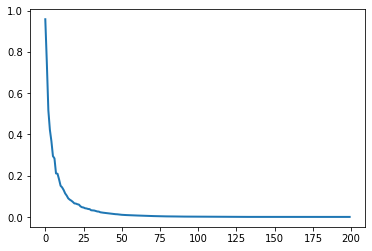

In [26]:
if __name__ == '__main__':
    data = pd.read_csv('datasets/data.csv',delimiter=',',header=0,encoding='utf-8')
    data['3']=chuli(data['3'])
    #重复值处理
    #data['0'].value_counts().head(10)
    #data = data.drop_duplicates(['0'])
    file_train = 'word_train2.txt'
    get_word_train(file_train)
    model = word2vec.Word2Vec.load('corpus.model')
    indexes = model.most_similar('疫情',topn=5)
    file1 = 'stopwords.txt'
    stopword = stopw(file1)
    X,y=get_train(data)
    pca = PCA().fit(X)
    plt.plot(pca.explained_variance_,linewidth=2)
    X_reduced = PCA(n_components=100).fit_transform(X)


In [ ]:
y[:5]

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor,MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [27]:
#逻辑回归（五折）
from sklearn.utils import shuffle
X_reduced,y = shuffle(X_reduced,y)
from sklearn.linear_model import LogisticRegression
nb=LogisticRegression()
#score=cross_val_score(nb,X_reduced,y,cv=5,scoring='accuracy')
#score.mean()
X_train,X_test,y_train,y_test = train_test_split(X_reduced,y,test_size=0.3)
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
joblib.dump(clf,"nb_model_200.pkl")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred, average='binary'))


E:\al\AL-new\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8572338055069234


In [28]:
#随机森林
from sklearn.externals import joblib
X_train,X_test,y_train,y_test = train_test_split(X_reduced,y,test_size=0.3,random_state = 5579)
clf = RF(n_estimators=200)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
#joblib.dump(clf,"train_model_200.pkl")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred, average='binary'))


0.9053321861265493


In [ ]:
yyy=[]
for i in range(len(y_pred)):
    if y_pred[i]==0:
        yyy.append(i)
    else:
        pass
print(len(yyy))

In [10]:
from keras import backend as K
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Using TensorFlow backend.


In [29]:
## 深度学习lstm
from sklearn.externals import joblib
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
nb_time_steps=1
X_train,X_test,y_train,y_test = train_test_split(X_reduced,y,test_size=0.3,random_state =5579)
# 构建网络，使用的是序贯模型
model = Sequential()

#return_sequences=True返回的是全部输出，LSTM做第一层时，需要指定输入shape
X_train=X_train.reshape(X_train.shape[0],nb_time_steps,X_train.shape[1])
X_test=X_test.reshape(X_test.shape[0],nb_time_steps,X_test.shape[1])

model.add(LSTM(units=128, input_shape=(nb_time_steps,X_train.shape[2])))
model.add(Dense(1))
# 进行配置
model.compile(optimizer='adam',loss='mean_absolute_error',metrics=[f1])
#mean_absolute_error 70.5%
model.fit(x=X_train, y=y_train, epochs=20, batch_size=20, verbose=1)
model.save('lstm_model_200.h5')
yPredictes = model.predict(x=X_test)
score,acc= model.evaluate(X_test,y_test,batch_size=20, verbose=1)
print(acc)

Epoch 1/20
65602/65602 [==============================] - 8s 123us/step - loss: 0.2901 - f1: 0.8232
Epoch 2/20
65602/65602 [==============================] - 13s 199us/step - loss: 0.2639 - f1: 0.8493
Epoch 3/20
65602/65602 [==============================] - 8s 120us/step - loss: 0.2533 - f1: 0.8550
Epoch 4/20
65602/65602 [==============================] - 14s 218us/step - loss: 0.2465 - f1: 0.8575
Epoch 5/20
65602/65602 [==============================] - 11s 164us/step - loss: 0.2419 - f1: 0.8584
Epoch 6/20
65602/65602 [==============================] - 11s 160us/step - loss: 0.2385 - f1: 0.8591
Epoch 7/20
65602/65602 [==============================] - 14s 206us/step - loss: 0.2358 - f1: 0.8591
Epoch 8/20
65602/65602 [==============================] - 8s 116us/step - loss: 0.2336 - f1: 0.8597
Epoch 9/20
65602/65602 [==============================] - 15s 226us/step - loss: 0.2315 - f1: 0.8610
Epoch 10/20
65602/65602 [==============================] - 15s 232us/step - loss: 0.2296 - f1: